## 3.3 Спроектувати i розробити нейронну мережу на основi набору даних FMNIST

### Імпортуємо значення набору даних MNIST з пакету keras. Вхідні дані мають розмір у 60 000 екземплярів та розширення у 32 * 32 пікселів.

In [115]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

*Завантаження датасету FMNIST*

### Позначимо індекси для кращого розуміння, що кожне число в y_train означає.

In [116]:
indexes = ['T-shirt/top', 'Trouser', 'Pullover',
           'Dress', 'Coat', 'Sandal', 'Shirt',
           'Sneaker', 'Bag', 'Ankle']

*Індекси, тобто імена класів*

### Переглянемо перші 25 зображень та відповідні їм індекси за допомогою модуля matplotlib.pyplot.

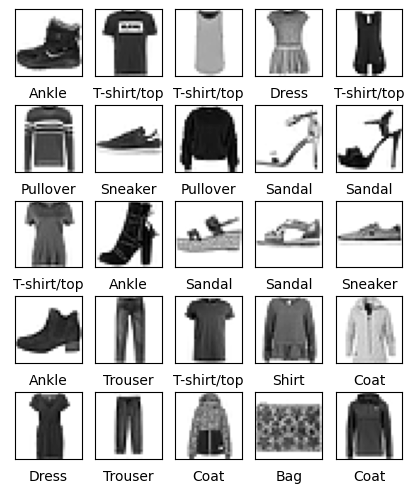

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(indexes[train_labels[i]])

*Зображення перших двадцяти п'яти елементів*

### Робимо перетворення тривимірного масиву в двовимірний масив типу float 32. Далі нормалізовуємо його, щоб отримати значення в інтервалі від [0, 1]. 

In [118]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

*Нормалізація даних*

### За архітектуру моделі оберемо Sequential. Використаємо щільні шари, де кожен нейрон одного шару зв  язаний з нейроном іншого. Прихований шар маює по 512 нейронів. Оскільки у нас є 10 індексів, то і вихідний шар міститиме 10 нейронів.

### 

In [119]:
from keras import models, layers
network = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(28 * 28, )),
    layers.Dense(512, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

*Побудова архітектури моделі*

### Скомпілюємо мережу, привівши її до сумісного вигляду із TensorFlow. Налаштуємо оптимізатор, функцію втрат, метрики.

In [120]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

*Компіляція моделі*

### Навчання моделі.

In [121]:
network.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5096 - accuracy: 0.8150
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3907 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3748 - accuracy: 0.8685
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3690 - accuracy: 0.8729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3601 - accuracy: 0.8756


*Навчання моделі*

### Перевіримо модель на контрольному наборі даних.

In [122]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4157 - accuracy: 0.8649


*Перевірка моделі*

### Зробимо збереження моделі командою model.save у форматі HDF5, що містить архітектуру, ваги, конфігурацію тренувань, стан оптимізатора.

In [123]:
network.save('fmnist.h5')

*Збереження моделі*

### Завантажуємо модель з файлу.

In [124]:
from keras.models import load_model
model = load_model('fmnist.h5')

*Завантаження моделі*

### Покажемо тестові картинки, на яких ми будемо тестувати модель.

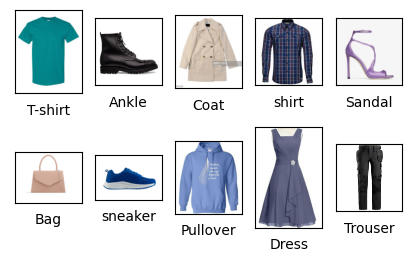

In [125]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = []
image_names = []
for img_path in glob.glob(  '/home/choleraplague/'\
                            'university/MachineLearning/'\
                            'Lab5/images/fmnist/*.jpg'):
    image_names.append(img_path.split('/')[-1].split('.')[0])
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(5, 3))
for i, name in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(name)

*Тестові зображення*

### Завантажимо їх в PIL у форматі ndarray. Потім переформатуємо цей масив до розміру, на якому відбувалося тренування нашої моделі.

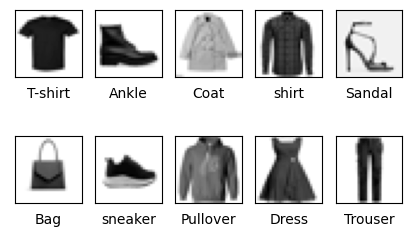

In [126]:
import PIL
import numpy as np

low_images = []

plt.figure(figsize=(5, 3))
for i, im in enumerate(image_names):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    tst = PIL.ImageOps.invert(
        PIL.Image.open(f'images/fmnist/{im}.jpg').convert('L'))
    tst_res = tst.resize((28, 28))
    plt.xlabel(im)
    plt.imshow(tst_res, cmap=plt.cm.binary)
    pix = np.array(tst_res)
    pix = pix.reshape((1, 28*28))
    pix = pix.astype('float32') / 255
    low_images.append(pix)
low_images = np.array(low_images)

*Обробка зображень*

### Спрогнозуємо результати, провівши тестування моделі.

In [127]:
for tst in low_images:
    pred = list(model.predict(tst)[0])
    print(indexes[pred.index(max(pred))])

1/1 [==============================] - 0s 67ms/step
T-shirt/top
1/1 [==============================] - 0s 18ms/step
Bag
1/1 [==============================] - 0s 16ms/step
Shirt
1/1 [==============================] - 0s 17ms/step
Shirt
1/1 [==============================] - 0s 17ms/step
Bag
1/1 [==============================] - 0s 16ms/step
Sandal
1/1 [==============================] - 0s 16ms/step
Sandal
1/1 [==============================] - 0s 16ms/step
Coat
1/1 [==============================] - 0s 17ms/step
Dress
1/1 [==============================] - 0s 16ms/step
Trouser


*Спрогнозовані результати*

### Отже, тестування свідчать про відносно неуспішну роботу нейренної мережі. Як ми побачили точність на тестових даних нейронної мережі оцінюється в 86.49 %. На мій погляд, достатньо складно для нейромережі пояснити, чим пальто відрізняється від пуловера чи сорочки, оскільки на малюнках у 28 * 28 пікселів ця різниця і деталі втрачаються. Я вважаю, що треба збільшувати роздільну здатність картинок та будувати складнішу архітектуру моделі.